In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv("../data/cars.csv")
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [4]:
raw_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
data = raw_data.drop("Model", axis=1)
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014


In [6]:
data.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
data_with_price = data.dropna(subset=["Price"])
data_with_price

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014


In [8]:
data_with_price.isnull().sum()

Brand             0
Price             0
Body              0
Mileage           0
EngineV         148
Engine Type       0
Registration      0
Year              0
dtype: int64

In [9]:
data_no_mv = data_with_price.copy()
data_no_mv["EngineV"] = data_with_price.EngineV.fillna(data_with_price.EngineV.median())

data_no_mv

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985
4343,Toyota,14200.0,sedan,31,2.2,Petrol,yes,2014


# Exploring the PDFs

### Playground with Price

<AxesSubplot:xlabel='Price', ylabel='Count'>

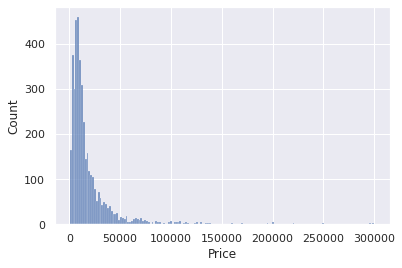

In [10]:
sns.histplot(data_no_mv["Price"])

In [11]:
# Resolve outliners
q = data_no_mv["Price"].quantile(0.99)
data_1 = data_no_mv[data_no_mv.Price < q]

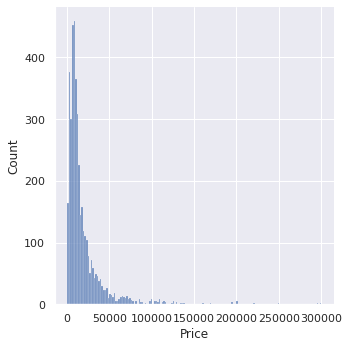

In [12]:
sns.displot(data_no_mv.Price)

/home/mvt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

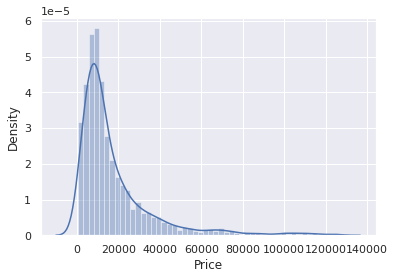

In [13]:
sns.distplot(data_1.Price)

### Playground with Year

/home/mvt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

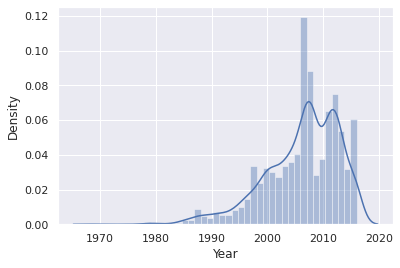

In [14]:
sns.distplot(data_1.Year)

In [15]:
q =  data_1.Year.quantile(0.01)
data_2 = data_1[data_1.Year > q]
data_2

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4343,Toyota,14200.0,sedan,31,2.2,Petrol,yes,2014


/home/mvt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

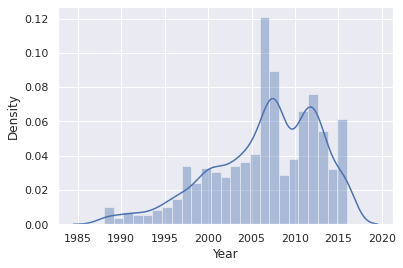

In [16]:
sns.distplot(data_2.Year)

### Playground With EngineV

/home/mvt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

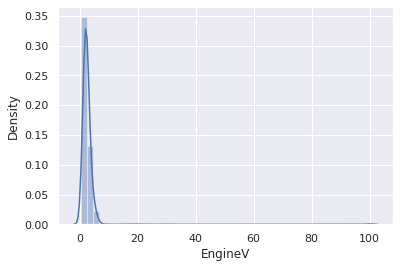

In [17]:
sns.distplot(data_2.EngineV)

In [18]:
data_3 = data_2[data_2.EngineV <= 6]
data_3

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4343,Toyota,14200.0,sedan,31,2.2,Petrol,yes,2014


/home/mvt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

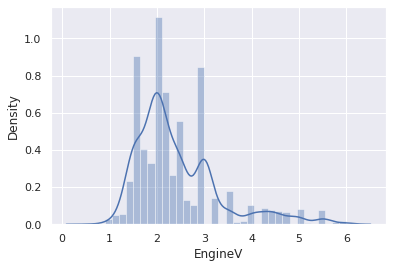

In [19]:
sns.distplot(data_3.EngineV)

### Playground Mileage

In [20]:
data_3.Mileage.unique().sum()

90520

/home/mvt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

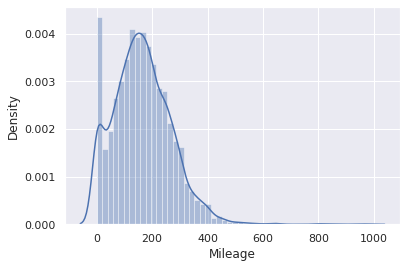

In [21]:
sns.distplot(data_3.Mileage)

In [22]:
q = data_3.Mileage.quantile(0.99)
cleaned_data = data_3[data_3.Mileage < q ]

cleaned_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4343,Toyota,14200.0,sedan,31,2.2,Petrol,yes,2014


/home/mvt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

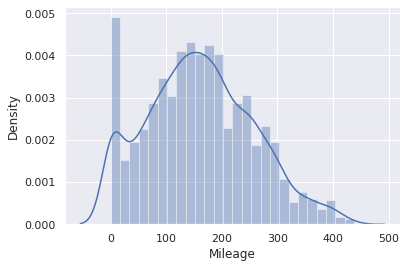

In [23]:
sns.distplot(cleaned_data.Mileage)

## Encode categorical data

In [24]:
for col, values in cleaned_data.items() :
    if not pd.api.types.is_numeric_dtype(values): 
        cleaned_data[col] = pd.Categorical(values).codes + 1

<ipython-input-24-0c9d777c0e7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[col] = pd.Categorical(values).codes + 1


In [25]:
pd.Categorical(cleaned_data["Brand"])

[2, 3, 3, 1, 6, ..., 6, 3, 2, 6, 7]
Length: 3994
Categories (7, int64): [1, 2, 3, 4, 5, 6, 7]

In [26]:
cleaned_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,2,4200.0,4,277,2.0,4,2,1991
1,3,7900.0,6,427,2.9,1,2,1999
2,3,13300.0,4,358,5.0,2,2,2003
3,1,23000.0,1,240,4.2,4,2,2007
4,6,18300.0,1,120,2.0,4,2,2011
...,...,...,...,...,...,...,...,...
4339,6,17900.0,4,35,1.6,4,2,2014
4340,3,125000.0,4,9,3.0,1,2,2014
4341,2,6500.0,4,1,3.5,4,2,1999
4343,6,14200.0,4,31,2.2,4,2,2014


### Find Correlation among variables

<AxesSubplot:>

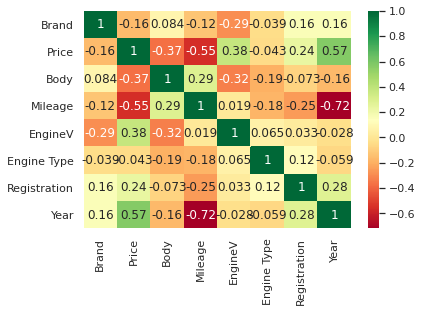

In [27]:
sns.heatmap(cleaned_data.corr(), annot=True, cmap="RdYlGn")

# Checking the OLS assumptions

[Text(0.5, 1.0, 'Price and Mileage')]

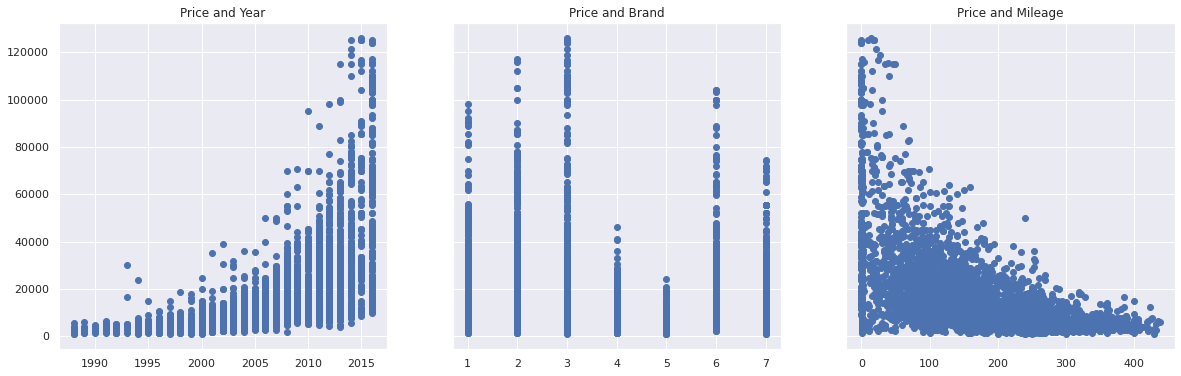

In [28]:
f , (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,6), sharey=True)
ax1.scatter(cleaned_data["Year"], cleaned_data["Price"])
ax1.set(title="Price and Year")
ax2.scatter(cleaned_data["Brand"], cleaned_data["Price"])
ax2.set(title="Price and Brand")
ax3.scatter(cleaned_data["Mileage"], cleaned_data["Price"],label="Price and Mileage")
ax3.set(title="Price and Mileage")

In [29]:
log_price = np.log(cleaned_data["Price"])
cleaned_data["Price"] = log_price

<ipython-input-29-1881119e3223>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["Price"] = log_price


[Text(0.5, 1.0, 'Price and Mileage')]

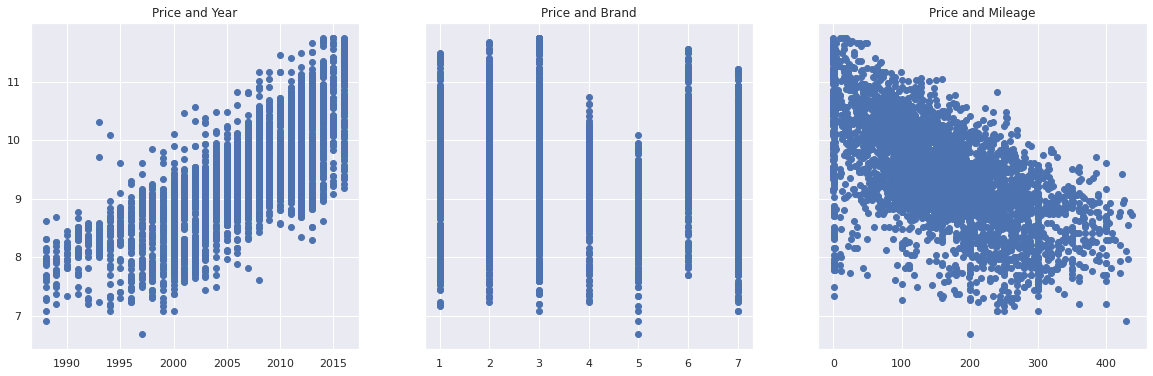

In [30]:
f , (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,6), sharey=True)
ax1.scatter(cleaned_data["Year"], cleaned_data["Price"])
ax1.set(title="Price and Year")
ax2.scatter(cleaned_data["Brand"], cleaned_data["Price"])
ax2.set(title="Price and Brand")
ax3.scatter(cleaned_data["Mileage"], cleaned_data["Price"],label="Price and Mileage")
ax3.set(title="Price and Mileage")

# Modelling data

In [31]:
X = cleaned_data.drop("Price", axis=1)
y = cleaned_data.Price
X

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year
0,2,4,277,2.0,4,2,1991
1,3,6,427,2.9,1,2,1999
2,3,4,358,5.0,2,2,2003
3,1,1,240,4.2,4,2,2007
4,6,1,120,2.0,4,2,2011
...,...,...,...,...,...,...,...
4339,6,4,35,1.6,4,2,2014
4340,3,4,9,3.0,1,2,2014
4341,2,4,1,3.5,4,2,1999
4343,6,4,31,2.2,4,2,2014


In [32]:
X.shape, y.shape

((3994, 7), (3994,))

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3195, 7), (799, 7), (3195,), (799,))

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_preds = model.predict(X_test)
y_preds.shape

(799,)

In [36]:
y_preds = model.predict(X_train)
y_preds.shape

(3195,)

In [37]:
y_preds[:20], np.array(y_test[:20])

(array([10.2125019 ,  7.95733283, 10.2500674 ,  7.8746817 ,  8.97332266,
         9.56803656,  8.73142363,  9.39315416,  9.82980643, 10.3460295 ,
        10.34969288, 10.00245125, 10.35743521,  7.44235581, 10.175766  ,
         9.00319681,  9.45744298,  9.40292884,  8.31256688,  9.10823247]),
 array([ 8.94897561,  9.04782144,  8.80986281,  9.53242387,  8.69951475,
         8.31874225,  9.21024037,  9.61580548,  9.28730141,  9.92818017,
         9.01188943, 10.02127059,  9.43348392,  9.79812704, 11.08212716,
         8.97449145, 10.77429963,  9.31569089,  9.10497986,  8.41183268]))

In [69]:
df_linear = pd.DataFrame(data=X.columns.values, columns=["Coefficient"])
df_linear["Weight"] = model.coef_

df_linear

,Coefficient,Weight
0,Brand,-0.062811
1,Body,-0.070363
2,Mileage,-0.001042
3,EngineV,0.310842
4,Engine Type,-0.037914
5,Registration,0.842800
6,Year,0.084994


<AxesSubplot:>

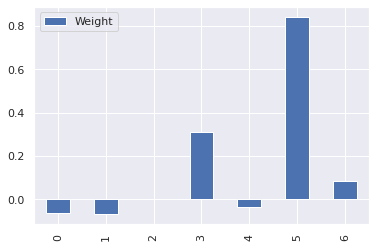

In [70]:
df_linear.plot(kind="bar")

### Evaluate model

In [38]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score

def rmsle(y_test, y_preds) : 
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few deffirent levels
def show_score(model) : 
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {
        "Train MAE" : mean_squared_error(y_train, train_preds),
        "Test MAE" : mean_squared_error(y_test, test_preds),
        "Train RMLSE" : rmsle(y_train, train_preds),
        "Test RMLSE" : rmsle(y_test, test_preds), 
        "Train R2" : r2_score(y_train, train_preds),
        "Test R2" : r2_score(y_test, test_preds),         
    }
    return scores

In [39]:
show_score(model)

{'Train MAE': 0.12559577031962607,
 'Test MAE': 0.12000820465345,
 'Train RMLSE': 0.03411865436785532,
 'Test RMLSE': 0.033316751627296706,
 'Train R2': 0.835460560512923,
 'Test R2': 0.8428988854174772}

# Evaluate model

## RandomizeSearch CV

In [46]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import  RandomForestRegressor

rf_grid = {
    "n_estimators" : np.arange(10,200,10),
    "max_depth" : [None, 2,3,5,10],
    "min_samples_split" : np.arange(2,20,2),
    "min_samples_leaf" : np.arange(1,20,2),
    "max_features" : ["auto","sqrt", "log2"], 
    "criterion" : ["mae","mse"]
}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42), 
                              rf_grid,
                              n_iter=20, 
                              verbose=2,
                              cv=5
                             )
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=190, min_samples_split=14, min_samples_leaf=13, max_features=sqrt, max_depth=10, criterion=mae 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=190, min_samples_split=14, min_samples_leaf=13, max_features=sqrt, max_depth=10, criterion=mae, total=   4.3s
[CV] n_estimators=190, min_samples_split=14, min_samples_leaf=13, max_features=sqrt, max_depth=10, criterion=mae 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


[CV]  n_estimators=190, min_samples_split=14, min_samples_leaf=13, max_features=sqrt, max_depth=10, criterion=mae, total=   2.3s
[CV] n_estimators=190, min_samples_split=14, min_samples_leaf=13, max_features=sqrt, max_depth=10, criterion=mae 
[CV]  n_estimators=190, min_samples_split=14, min_samples_leaf=13, max_features=sqrt, max_depth=10, criterion=mae, total=   2.3s
[CV] n_estimators=190, min_samples_split=14, min_samples_leaf=13, max_features=sqrt, max_depth=10, criterion=mae 
[CV]  n_estimators=190, min_samples_split=14, min_samples_leaf=13, max_features=sqrt, max_depth=10, criterion=mae, total=   2.9s
[CV] n_estimators=190, min_samples_split=14, min_samples_leaf=13, max_features=sqrt, max_depth=10, criterion=mae 
[CV]  n_estimators=190, min_samples_split=14, min_samples_leaf=13, max_features=sqrt, max_depth=10, criterion=mae, total=   3.7s
[CV] n_estimators=130, min_samples_split=16, min_samples_leaf=17, max_features=log2, max_depth=None, criterion=mse 
[CV]  n_estimators=130, mi

[CV]  n_estimators=110, min_samples_split=6, min_samples_leaf=5, max_features=sqrt, max_depth=2, criterion=mae, total=   1.1s
[CV] n_estimators=110, min_samples_split=6, min_samples_leaf=5, max_features=sqrt, max_depth=2, criterion=mae 
[CV]  n_estimators=110, min_samples_split=6, min_samples_leaf=5, max_features=sqrt, max_depth=2, criterion=mae, total=   1.0s
[CV] n_estimators=110, min_samples_split=6, min_samples_leaf=5, max_features=sqrt, max_depth=2, criterion=mae 
[CV]  n_estimators=110, min_samples_split=6, min_samples_leaf=5, max_features=sqrt, max_depth=2, criterion=mae, total=   1.0s
[CV] n_estimators=110, min_samples_split=6, min_samples_leaf=5, max_features=sqrt, max_depth=2, criterion=mae 
[CV]  n_estimators=110, min_samples_split=6, min_samples_leaf=5, max_features=sqrt, max_depth=2, criterion=mae, total=   1.2s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=3, max_features=log2, max_depth=None, criterion=mae 
[CV]  n_estimators=100, min_samples_split=4, min_

[CV]  n_estimators=180, min_samples_split=6, min_samples_leaf=3, max_features=sqrt, max_depth=5, criterion=mae, total=   2.2s
[CV] n_estimators=180, min_samples_split=6, min_samples_leaf=3, max_features=sqrt, max_depth=5, criterion=mae 
[CV]  n_estimators=180, min_samples_split=6, min_samples_leaf=3, max_features=sqrt, max_depth=5, criterion=mae, total=   2.0s
[CV] n_estimators=180, min_samples_split=6, min_samples_leaf=3, max_features=sqrt, max_depth=5, criterion=mae 
[CV]  n_estimators=180, min_samples_split=6, min_samples_leaf=3, max_features=sqrt, max_depth=5, criterion=mae, total=   2.7s
[CV] n_estimators=180, min_samples_split=6, min_samples_leaf=3, max_features=sqrt, max_depth=5, criterion=mae 
[CV]  n_estimators=180, min_samples_split=6, min_samples_leaf=3, max_features=sqrt, max_depth=5, criterion=mae, total=   2.6s
[CV] n_estimators=70, min_samples_split=18, min_samples_leaf=17, max_features=log2, max_depth=10, criterion=mse 
[CV]  n_estimators=70, min_samples_split=18, min_s

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=20,
                   param_distributions={'criterion': ['mae', 'mse'],
                                        'max_depth': [None, 2, 3, 5, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   verbose=2)

In [47]:
rs_model.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': None,
 'criterion': 'mae'}

In [72]:
rs_model.best_score_

0.9093857791263458

In [77]:
show_score(rs_model)

{'Train MAE': 0.043987223423153046,
 'Test MAE': 0.05891568040466458,
 'Train RMLSE': 0.020800018068330445,
 'Test RMLSE': 0.024061694623014888,
 'Train R2': 0.9423735921343567,
 'Test R2': 0.9228742810986263}

## Importante Features

In [83]:
ideal_model = RandomForestRegressor(n_estimators=100, 
                                    min_samples_split=4,
                                    min_samples_leaf=3,
                                    max_features="log2",
                                    max_depth=None,
                                    criterion="mae")

ideal_model.fit(X_train, y_train)

RandomForestRegressor(criterion='mae', max_features='log2', min_samples_leaf=3,
                      min_samples_split=4)

In [85]:
ideal_model.score(X_test, y_test)

0.9230959221984895

In [87]:
ideal_model.feature_importances_

array([0.10107535, 0.10281054, 0.17881009, 0.16426757, 0.02315157,
       0.10457233, 0.32531254])

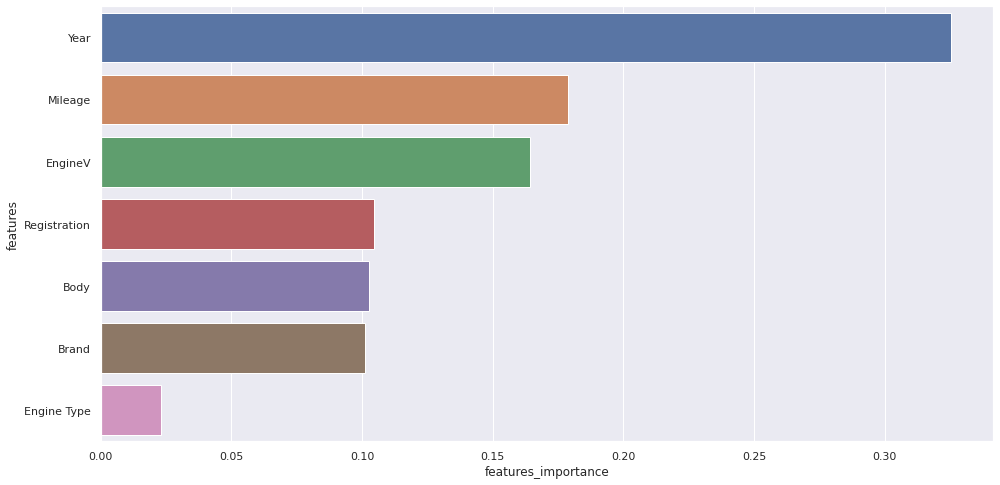

In [105]:
def plot_important_features(columns, importances, n=20 ) : 
    df = pd.DataFrame({"features" : columns, "features_importance" :importances}).sort_values(by="features_importance", ascending=False).   reset_index()
    # plot df
    fig = plt.figure(figsize=(16,8))
    sns.barplot(x="features_importance", y="features", data=df, orient="h")
plot_important_features(X_train.columns.values, ideal_model.feature_importances_)